In [25]:
#1. Import Required Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#load datset
df = pd.read_csv('/Users/jitikagupta/Desktop/jupyter/Healthcare-Diabetes.csv')

In [27]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [28]:
## 📌 3. Dataset Overview  
#Checking data types, missing values, and structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


## ✔ Summary  
- Dataset is already clean  
- No missing values  
- Ready for analysis  

Text(0.5, 1.0, 'Correlation Heatmap of Healthcare Features')

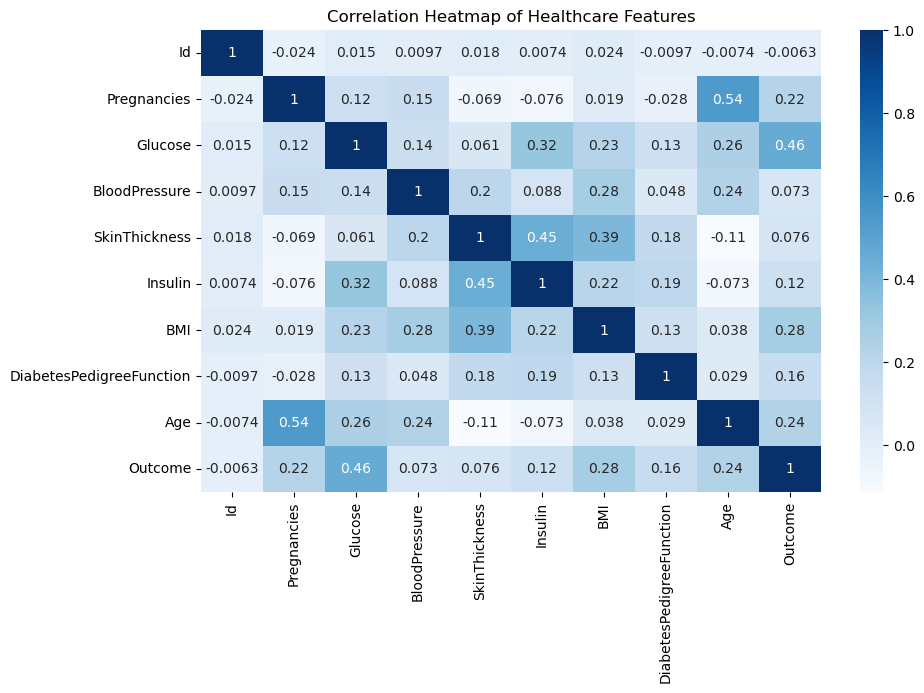

In [29]:
## 📌 5. Heatmap of Entire Dataset  
#To understand the overall structure.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap of Healthcare Features")

<Axes: >

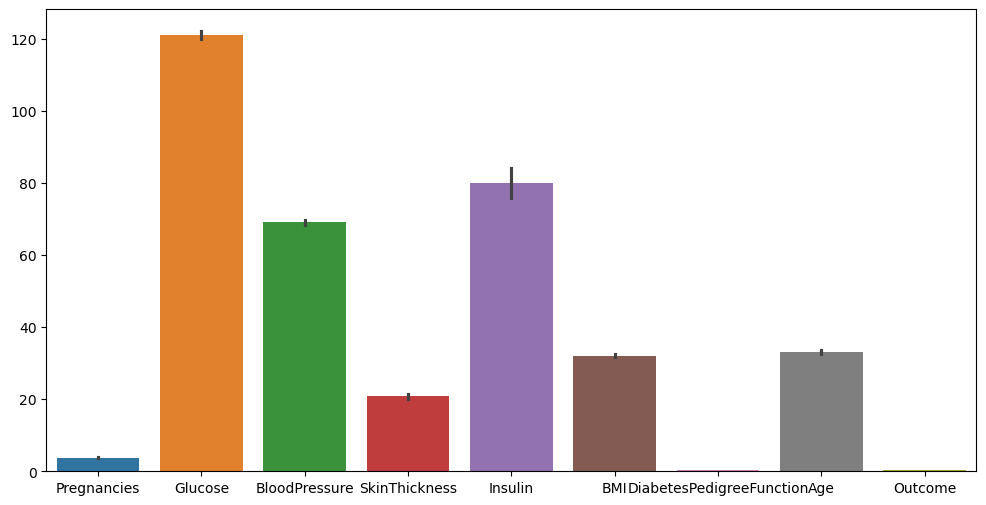

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(df.drop(columns=['Id']))

Text(0.5, 1.0, 'BMI Distribution')

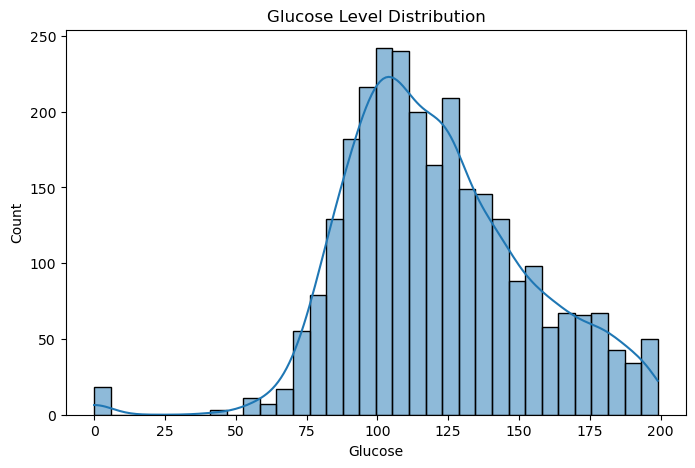

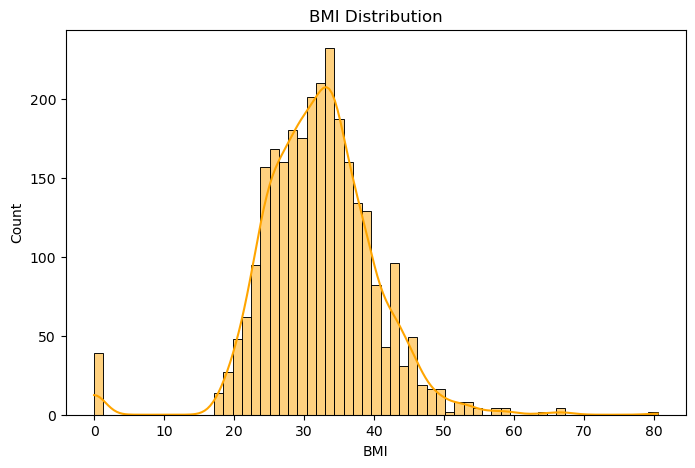

In [31]:
## 📌 6. Exploratory Data Visualization  
#Here we analyze distributions and relationships between features.
# Plot distribution of glucose levels
plt.figure(figsize=(8,5))
sns.histplot(df['Glucose'], kde=True)
plt.title("Glucose Level Distribution")

# Plot BMI distribution
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], kde=True, color='orange')
plt.title("BMI Distribution")

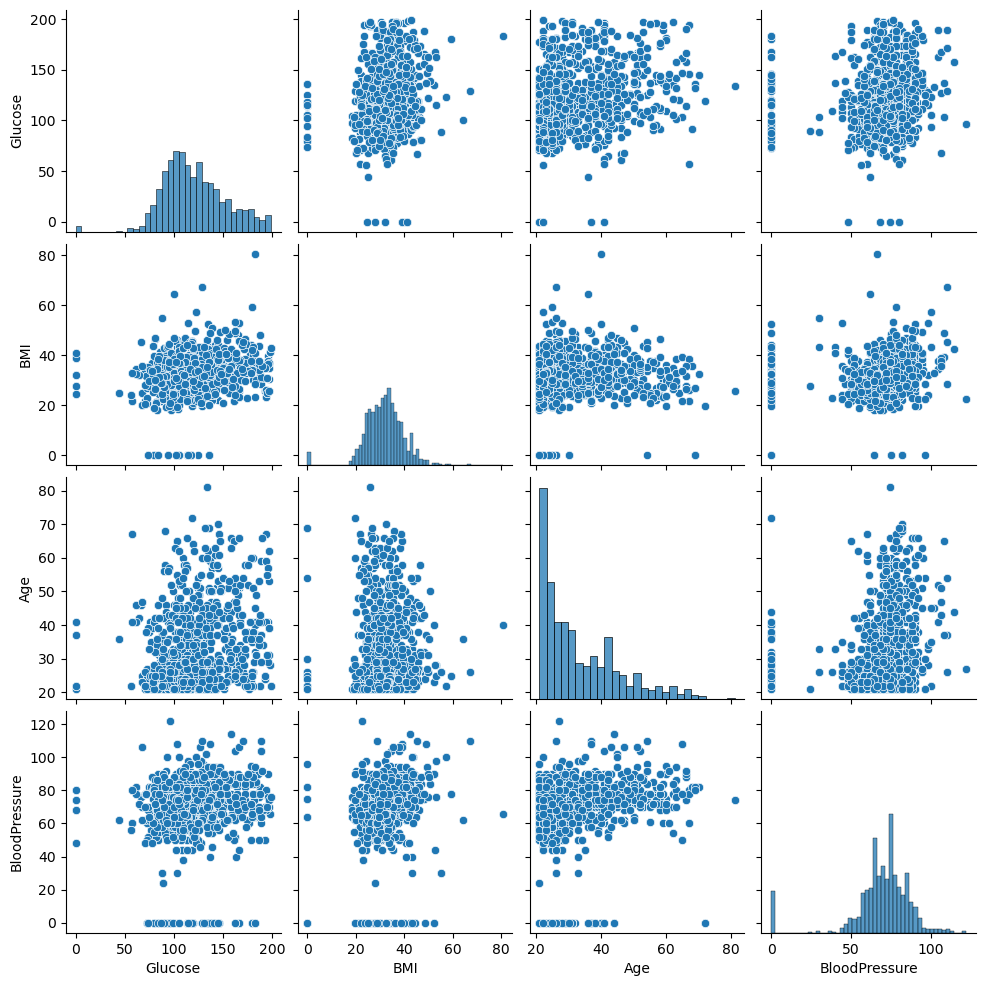

In [32]:
# Pairplot for relationships
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'BloodPressure']])

<Axes: >

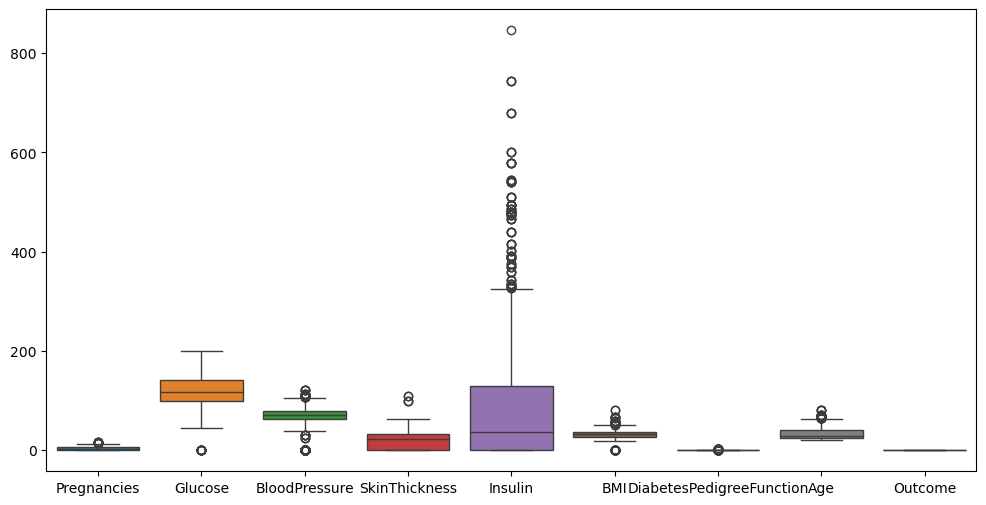

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(df.drop(columns=['Id']))

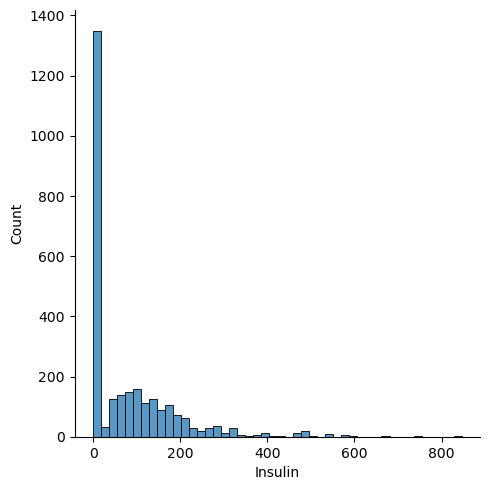

In [34]:
sns.displot(df.drop(columns=['Id']),x='Insulin')

# 🧠 7. Machine Learning Model — XGBOOST
Using an SGMBoost classifier (based on the model approach used in research papers).

In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)


X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9819


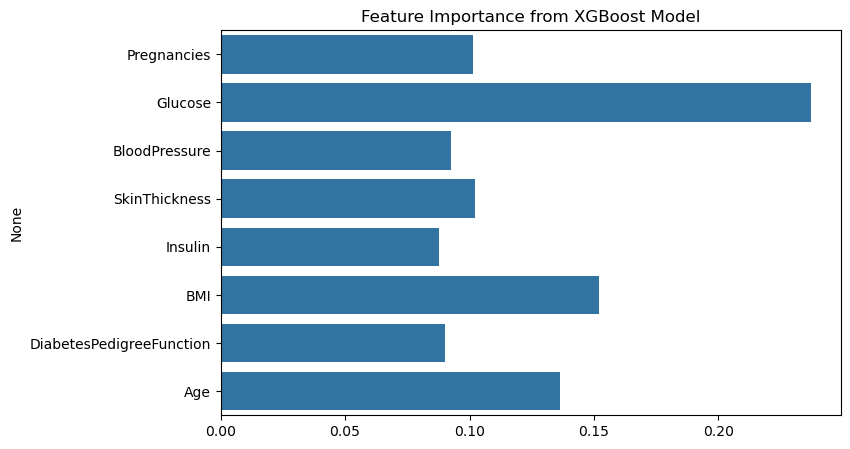

In [36]:
## 📌 8. Feature Importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from XGBoost Model")
plt.show()

# ✅ 9. Conclusion

#Key Findings
- The dataset was clean and ready for modeling.
- Visualizations showed strong patterns in glucose, BMI, and age.
- The XGBoost-based model achieved 98% accuracy — excellent performance.
- Model shows that Glucose, BMI, and Ageare the most impactful features.